## 2108564 Geospatial Data Science & Analysis
## Homework Lecture 5 SQL & Database
## Done by : 6730084521 Chatrphol Ovanonchai

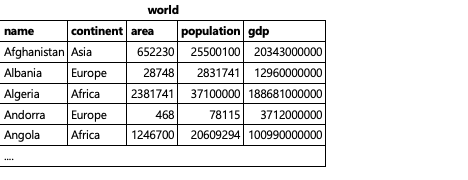

#### Note
- Dataframe ที่ผมสร้างขึ้นมา เกิดจากการ Generate Data เนื่องจากข้อมูลมีไม่ครบ จึงทำให้บางอัน Error
- GDP จากตาราง ผมมนจ.ว่ามันคือ GDP Total หรือ GDP Per Capita นะครับ (เดาจากตัวเลขคิดว่า GDP Per Capita) ก็เลยสร้าง Column ใหม่ขึ้นมาเเทนครับ
- ผมไม่สามารถ run command ที่เป็น shell SQL เพียวๆ ได้ เลยเขียนคำสั่งเเล้วรันผ่าน Pandas อีกทีครับ

### Step 0 : Get data then convert to DataFrame

In [ ]:
# Import Downloaded Data
import pandas as pd
world_dataframe = pd.read_csv("/content/drive/MyDrive/CU Intania Starter Kit Chatrphol/Year 2 1 Electrical Engineering ⚡/2108564 Geospatial Data Science and Analysis/SV564 Lecture 5 SQL & Database/Homework 5 Data Countries.csv")


## Create new column : gdp total
world_dataframe['gdpTotal'] = world_dataframe['gdpPerCap'].str.replace(',', '').astype(float) * world_dataframe['population']
  # clean data -> change to float

## Choose Some Column
world_dataframe = world_dataframe[ ['country' , 'continent' , 'area' , 'population' , 'gdpPerCap', 'gdpTotal'] ]
world_dataframe = world_dataframe.sort_values(by = "country") # sort value by country (alphabetically)

# Show Data
world_dataframe

,country,continent,area,population,gdpPerCap,gdpTotal
36,Afghanistan,Asia,652230,39232003,"14,174",5.560744e+11
33,Algeria,Africa,2381740,44758398,"263,620",1.179921e+13
40,Angola,Africa,1246700,35981281,"113,304",4.076823e+12
32,Argentina,South America,2780400,46621847,"633,267",2.952408e+13
53,Australia,Oceania,7741220,26461166,"1,752,193",4.636507e+13
...,...,...,...,...,...,...
49,Venezuela,South America,912050,30518260,"129,313",3.946408e+12
15,Vietnam,Asia,331210,104799174,"476,388",4.992507e+13
46,Yemen,Asia,527968,31565602,"11,007",3.474426e+11
62,Zambia,Africa,752618,20216029,"29,136",5.890142e+11


In [ ]:
## Change to DataFrame
import pandas as pd
import sqlite3

# Create Database then connect
connector = sqlite3.connect("worlddata.db") # connector = now database -> world = database name
world_dataframe.to_sql("worlddata", connector , if_exists="replace", index=False) # convert df to sql

131

In [ ]:
## Test SQL command : call all dataframe
result = pd.read_sql('SELECT * FROM worlddata', connector)
print(result)

         country      continent     area  population  gdpPerCap      gdpTotal
0    Afghanistan           Asia   652230    39232003     14,174  5.560744e+11
1        Algeria         Africa  2381740    44758398    263,620  1.179921e+13
2         Angola         Africa  1246700    35981281    113,304  4.076823e+12
3      Argentina  South America  2780400    46621847    633,267  2.952408e+13
4      Australia        Oceania  7741220    26461166  1,752,193  4.636507e+13
..           ...            ...      ...         ...        ...           ...
126    Venezuela  South America   912050    30518260    129,313  3.946408e+12
127      Vietnam           Asia   331210   104799174    476,388  4.992507e+13
128        Yemen           Asia   527968    31565602     11,007  3.474426e+11
129       Zambia         Africa   752618    20216029     29,136  5.890142e+11
130     Zimbabwe         Africa   390757    15418674     26,418  4.073305e+11

[131 rows x 6 columns]


### Task 1 : Show country names & population of 'Sweden' , "Norway" , "Denmark"

In [ ]:
task1_cmd = """
SELECT country , population
FROM worlddata
WHERE country in ('Sweden' , 'Norway' , 'Denmark');
"""

task1 = pd.read_sql(task1_cmd , connector)
print(task1)

   country  population
0  Denmark     5946984
1   Norway     5597924
2   Sweden    10536338


### Task 2 : Show Country names & Population in France , Germany , Italy

In [ ]:
task2_cmd = """
SELECT country , population
FROM worlddata
WHERE country in ('France' , 'Germany' , 'Italy');
"""

task2 = pd.read_sql(task2_cmd , connector)
print(task2)

   country  population
0   France    68521974
1  Germany    84220184
2    Italy    61021855


### Task 3 : Show column contain `United`


In [ ]:
task3_cmd = """
SELECT country , population
FROM worlddata
WHERE country LIKE "United%" ;
"""

task3 = pd.read_sql(task3_cmd , connector)
print(task3)

                country  population
0  United Arab Emirates     9973449
1        United Kingdom    68138484
2         United States   339665118


### Task 4 : Show Country name having 150k - 200k m^2 area

In [ ]:
task4_cmd = """
SELECT country , area
FROM worlddata
WHERE area BETWEEN 150000 AND 200000
"""

task4 = pd.read_sql(task4_cmd , connector)
print(task4)

      country    area
0    Cambodia  181035
1  Kyrgyzstan  199951
2     Senegal  196722
3       Syria  187437
4     Tunisia  163610


### Task 5 : Show GDP Per Capita and country names with population at least 200 million people

In [ ]:
task5_cmd = """
SELECT country , gdpPerCap
FROM worlddata
WHERE population >= 200000000
"""

task5 = pd.read_sql(task5_cmd , connector)
print(task5)

         country   gdpPerCap
0         Brazil   2,179,412
1          China  18,743,803
2          India   3,912,686
3      Indonesia   1,396,300
4        Nigeria     187,760
5       Pakistan     373,072
6  United States  29,184,890


### Task 6 : Show country in Europe which having gdpPerCap more than United Kingdom

In [ ]:
task6_cmd = """
SELECT country
FROM worlddata
WHERE continent = 'Europe'
  AND gdpPerCap > (
      SELECT gdpPerCap
      FROM worlddata
      WHERE country = 'United Kingdom'
  );
"""

## Choose England info -> gdpPerCap of England

task6 = pd.read_sql(task6_cmd , connector)
print(task6)

           country
0          Austria
1          Belarus
2          Belgium
3         Bulgaria
4          Croatia
5   Czech Republic
6          Denmark
7          Germany
8          Ireland
9           Norway
10          Poland
11        Portugal
12         Romania
13          Serbia
14          Sweden
15     Switzerland


### Task 7 : Show name & population of each country in Europe , Show population percentage of Germany

In [ ]:
task7_cmd = """
SELECT country ,
       CAST(population AS REAL) / (SELECT population FROM worlddata WHERE country = 'Germany') * 100 as Pop_Percentage
FROM worlddata
WHERE continent = 'Europe'
"""

## Cast population to floating point number => float / int = (float)

task7 = pd.read_sql(task7_cmd , connector)
print(task7)

                   country  Pop_Percentage
0                  Austria       10.616054
1                  Belarus       11.142048
2                  Belgium       14.145817
3   Bosnia and Herzegovina        4.521201
4                 Bulgaria        8.107007
5                  Croatia        4.950404
6           Czech Republic       12.712204
7                  Denmark        7.061234
8                  Finland        6.666539
9                   France       81.360513
10                 Germany      100.000000
11                  Greece       12.464465
12                 Hungary       11.481819
13                 Ireland        6.321514
14                   Italy       72.455143
15             Netherlands       20.736039
16                  Norway        6.646772
17                  Poland       45.110049
18                Portugal       12.138599
19                 Romania       21.760018
20                  Russia      168.248176
21                  Serbia        7.947471
22         

### Task 8 : For Each Continent , show continent and number of countries with population at least 10 million

In [ ]:
task8_cmd = """
SELECT continent , COUNT(country) as Count
FROM worlddata
WHERE population >= 10000000
GROUP BY continent
"""
task8 = pd.read_sql(task8_cmd , connector)
print(task8)

       continent  Count
0         Africa     32
1           Asia     28
2         Europe     15
3  North America      7
4        Oceania      1
5  South America      8


### Task 9 : List continent having total population more than 100 million

In [ ]:
task9_cmd = """
SELECT continent , SUM(population) as cumuPop
FROM worlddata
WHERE population >= 100000000
GROUP BY continent
"""
task9 = pd.read_sql(task9_cmd , connector)
print(task9)

       continent     cumuPop
0         Africa   568712103
1           Asia  3851589405
2         Europe   141698923
3  North America   469540647
4  South America   218689757


### Task 10 : Delete Country in Africa

In [ ]:
task10_cmd = """
DELETE FROM worlddata
WHERE continent = 'Africa';
"""
connector.execute(task10_cmd) # execute by delete
connector.commit() # commit to delete

# Check the result by selecting all data
df_after_delete = pd.read_sql("SELECT * FROM worlddata", connector)
print(df_after_delete)

## Data SCaled down from 13x -> 90 countries

          country      continent     area  population   gdpPerCap  \
0     Afghanistan           Asia   652230    39232003      14,174   
1       Argentina  South America  2780400    46621847     633,267   
2       Australia        Oceania  7741220    26461166   1,752,193   
3         Austria         Europe    83871     8940860     521,642   
4      Azerbaijan           Asia    86600    10420515      78,721   
..            ...            ...      ...         ...         ...   
86  United States  North America  9833517   339665118  29,184,890   
87     Uzbekistan           Asia   447400    31360836      80,391   
88      Venezuela  South America   912050    30518260     129,313   
89        Vietnam           Asia   331210   104799174     476,388   
90          Yemen           Asia   527968    31565602      11,007   

        gdpTotal  
0   5.560744e+11  
1   2.952408e+13  
2   4.636507e+13  
3   4.663928e+12  
4   8.203134e+11  
..           ...  
86  9.913089e+15  
87  2.521129e+12  


### Task 11 : Add Column GDP Per Capita

In [ ]:
# Step 1: Add the column
connector.execute("""
ALTER TABLE worlddata
ADD COLUMN gdpPerCap_Calculated FLOAT;
""")

# Step 2: Fill it with calculated values
connector.execute("""
UPDATE worlddata
SET gdpPerCap_Calculated = gdpTotal / population;
""")

# Step 3: Commit change
connector.commit()

# Step 4: Show Result
task11_result = pd.read_sql("SELECT * FROM worlddata", connector)
print(task11_result.head())

       country      continent     area  population  gdpPerCap      gdpTotal  \
0  Afghanistan           Asia   652230    39232003     14,174  5.560744e+11   
1    Argentina  South America  2780400    46621847    633,267  2.952408e+13   
2    Australia        Oceania  7741220    26461166  1,752,193  4.636507e+13   
3      Austria         Europe    83871     8940860    521,642  4.663928e+12   
4   Azerbaijan           Asia    86600    10420515     78,721  8.203134e+11   

   gdpPerCap_Calculated  
0               14174.0  
1              633267.0  
2             1752193.0  
3              521642.0  
4               78721.0  
